In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
file='D:\\college\\6th_Sem\\Minor_Project\\datasets_4123_6408_framingham.csv'
data = pd.read_csv(file)

In [3]:
data.shape

(4240, 16)

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data.drop('education', axis=1, inplace=True)

In [8]:
data.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [9]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
# X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.20, random_state=0)
# train_data = pd.concat([X_train, y_train], axis=1)
# test_data = pd.concat([X_test, y_test], axis=1)
# train_data.to_csv('./heart_study_train.csv')
# test_data.to_csv('./heart_study_test.csv')

# EDA

C:\Users\Satwik\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='CHD', ylabel='age'>

C:\Users\Satwik\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


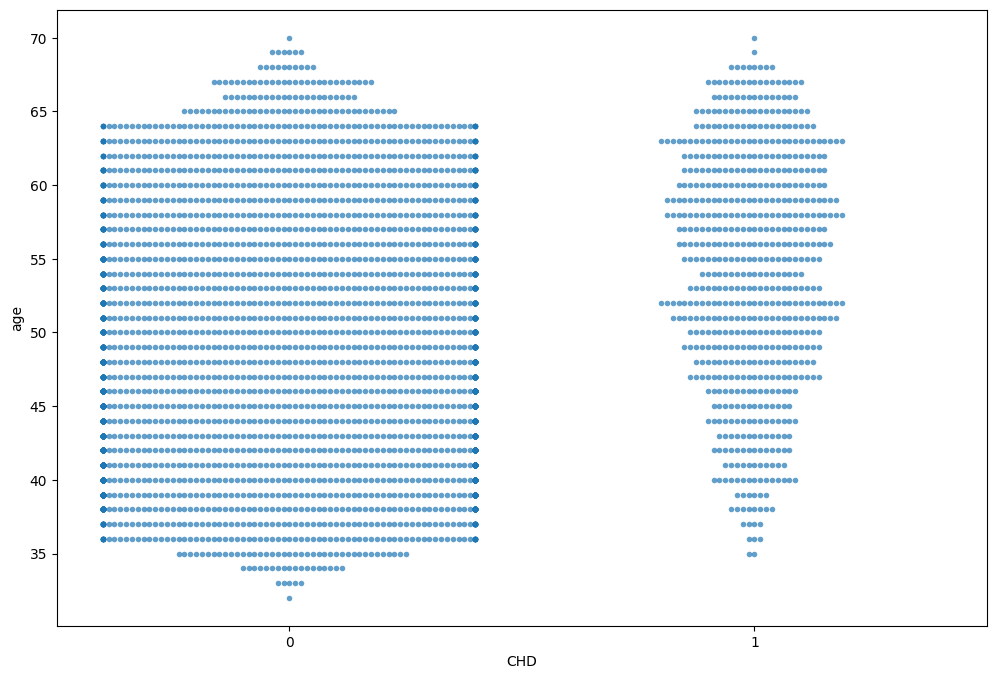

In [11]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='CHD', y='age', data=data,size=4, alpha=0.7)

<Axes: xlabel='CHD', ylabel='age'>

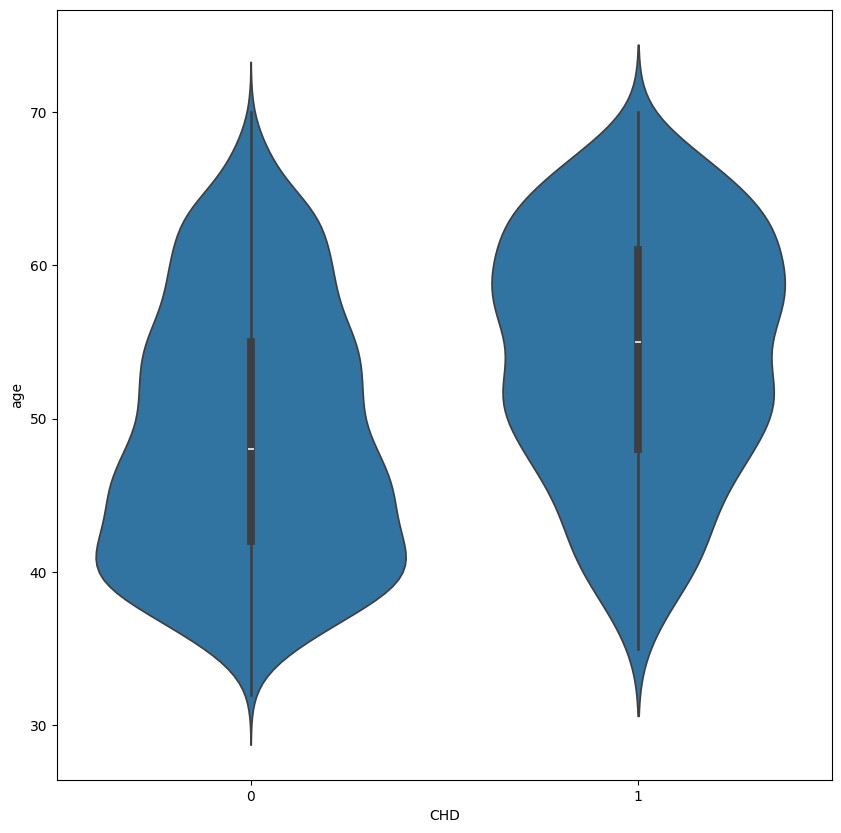

In [12]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=data)

Violinplot tells that most patients of age around 40-55 have 0 risk

Most patients of age around 60-65 have risk of disease (CHD)

<Axes: xlabel='CHD', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


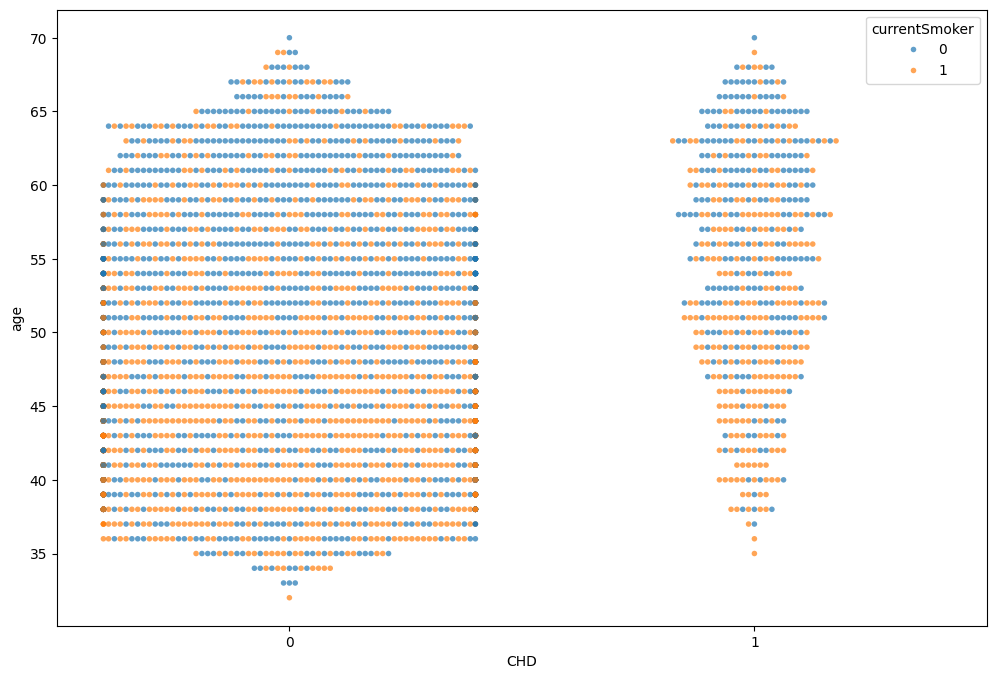

In [ ]:
# age vs CHD for smokers or non-smoker
plt.figure(figsize=(12,8))
sns.swarmplot(x='CHD', y='age', data=data, hue='currentSmoker', size=4, alpha=0.7)

<Axes: xlabel='CHD', ylabel='age'>

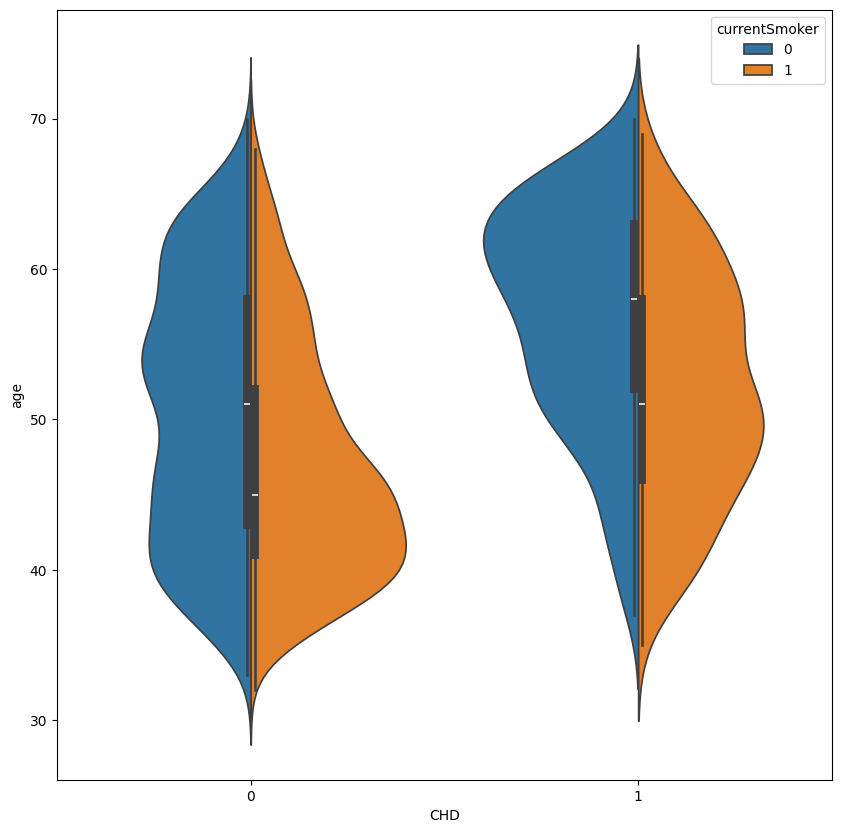

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=data, hue='currentSmoker', split=True)

From this violinplot, we see that most of smokers having no risk of CHD are in age around 40 years

But most of non-smokers having risk are in age around 65-70 years
Also most smokers having risk are in age around 50 years

<Axes: xlabel='male', ylabel='count'>

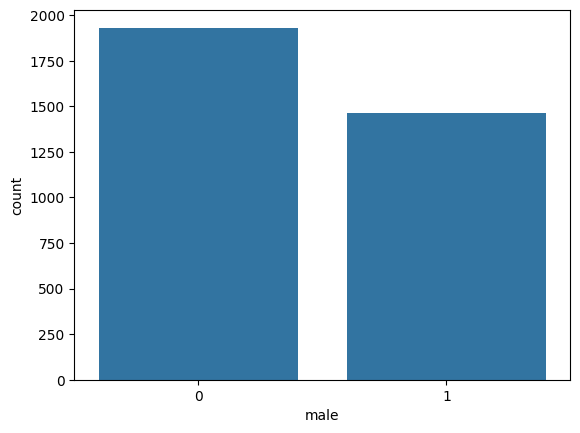

In [ ]:
# male and female countplot
sns.countplot(x=data['male'])

<Axes: xlabel='male', ylabel='count'>

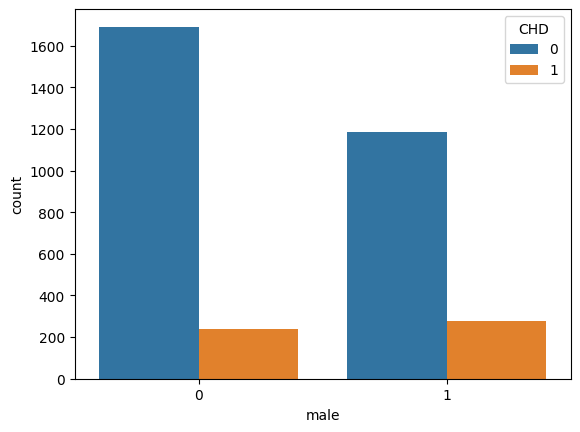

In [ ]:
# male and female having disease or not
sns.countplot(x=data['male'], hue=data['CHD'])

Here from the above countplot, we see that most data are females

There are more females having no risk than males having no risk

There are slightly more males having risk than females having risk

In [13]:
data.iloc[:,:5]

,male,age,currentSmoker,cigsPerDay,BPMeds
0,1,39,0,0.0,0.0
1,0,46,0,0.0,0.0
2,1,48,1,20.0,0.0
3,0,61,1,30.0,0.0
4,0,46,1,23.0,0.0
...,...,...,...,...,...
4235,0,48,1,20.0,NaN
4236,0,44,1,15.0,0.0
4237,0,52,0,0.0,0.0
4238,1,40,0,0.0,0.0


<Figure size 2000x1500 with 0 Axes>

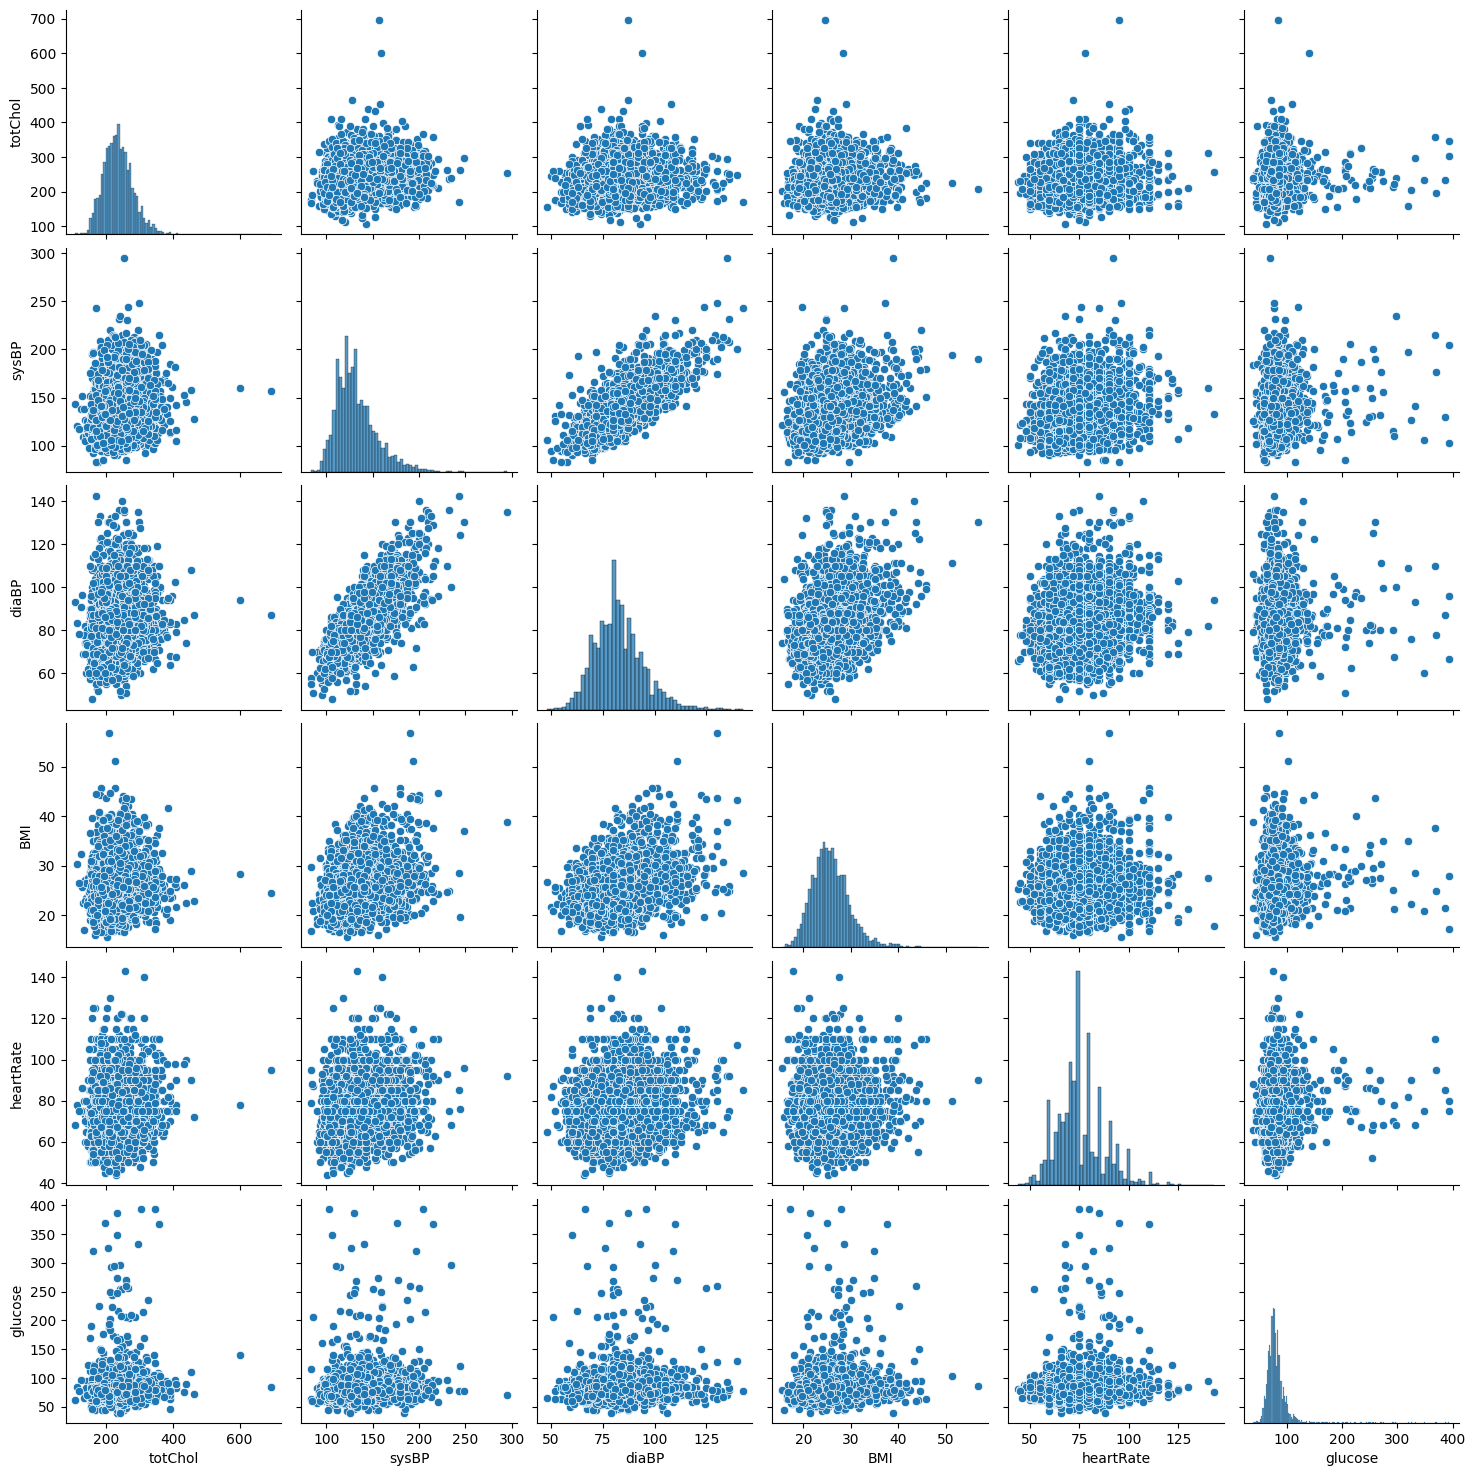

In [14]:
# To understand correlation between some features, pairplot is used
plt.figure(figsize=(20,15))
sns.pairplot(data.loc[:,'totChol': 'glucose'])

<Axes: >

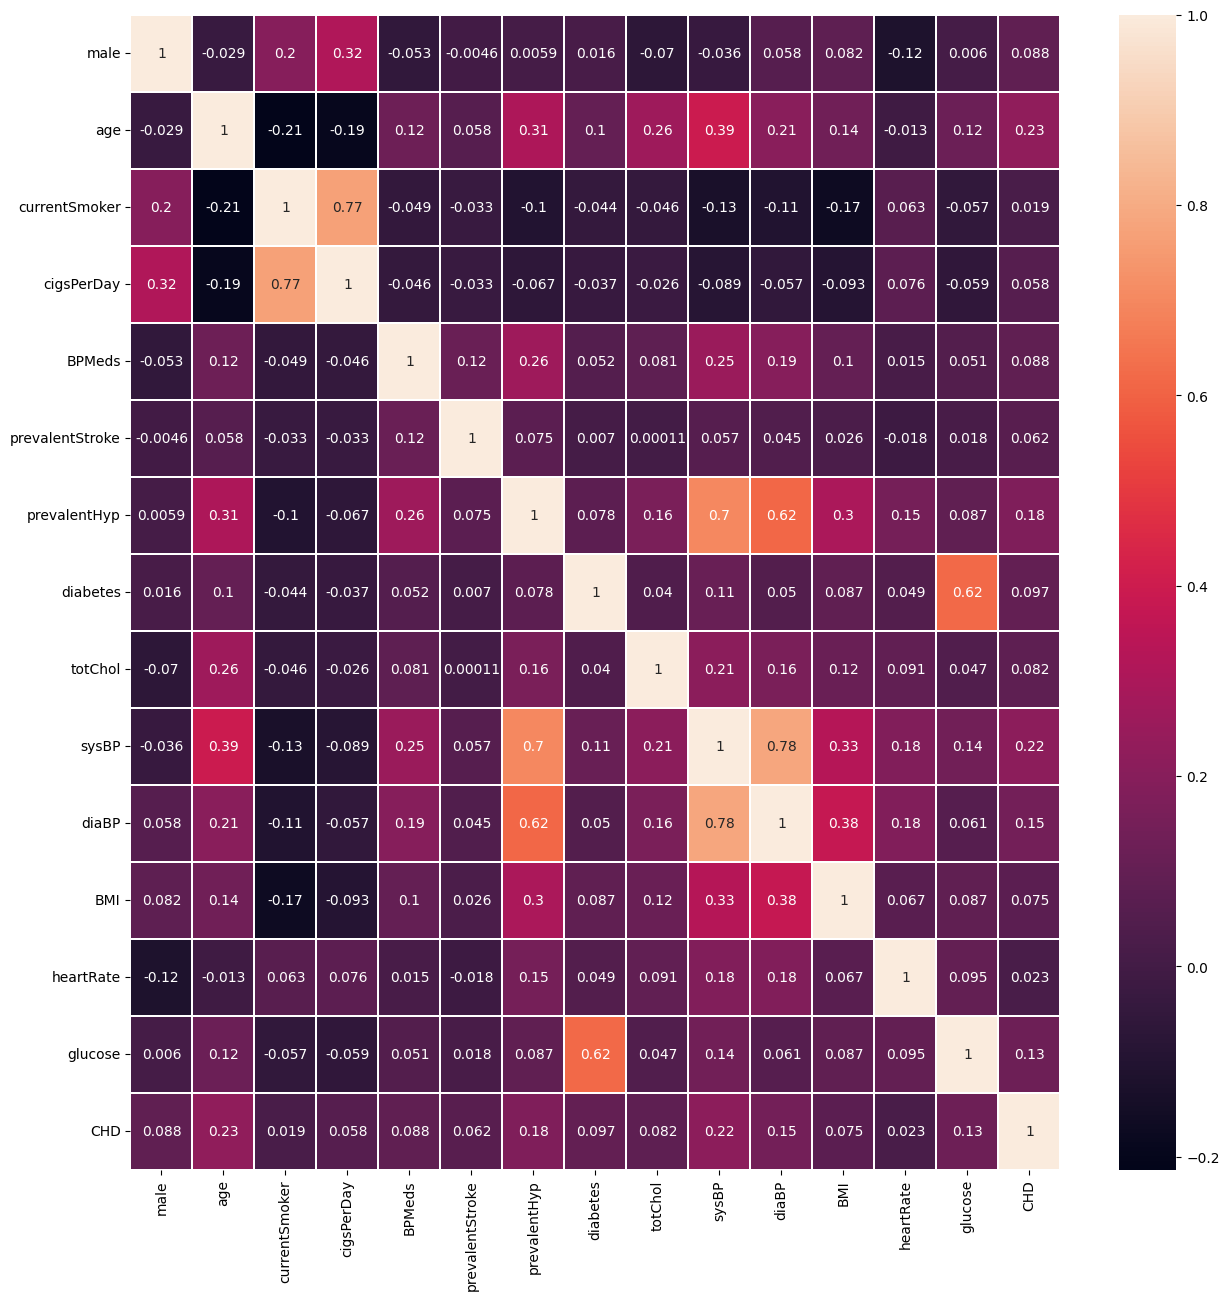

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=0.1)

From pairplot and heatmap we see that sysBP and diaBP are highly correlated

And currentSmoker and cigsPerDay are highly correlated

In [16]:
# dropping features which are highly correlated
features_to_drop = ['currentSmoker', 'diaBP']

data.drop(features_to_drop, axis=1, inplace=True)

In [17]:
data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,23.10,85.0,85.0,0


# Missing Values Checking

Missing values can be done before EDA or after EDA. But before EDA, it will impute or drop missing values for all features, whether some features are needed or not

And after EDA, we choose the features which are needed and those features only get imputed.

Also, the steps best for model preparation is : EDA -> Preprocessing (Missing values, Outliers, Normalise etc.) -> Model Fitting and Prediction

In [18]:
missing_values_count = data.isnull().sum()
missing_values_count = missing_values_count[missing_values_count > 0]
missing_values_percent = (missing_values_count * 100) / (data.shape[0])

print(max(missing_values_percent))

9.150943396226415


Maximum missing percentage is 9% approx so imputation will be done

In [19]:
print(missing_values_count)

cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64


In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [21]:
new_data = pd.DataFrame(imputer.fit_transform(data))
new_data.columns = data.columns
new_data.index = data.index

In [22]:
data.isnull().sum()

male                 0
age                  0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
BMI                 19
heartRate            1
glucose            388
CHD                  0
dtype: int64

In [23]:
new_data.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
CHD                0
dtype: int64

In [24]:
new_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,26.97,80.0,77.0,0.0
1,0.0,46.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,28.73,95.0,76.0,0.0
2,1.0,48.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,25.34,75.0,70.0,0.0
3,0.0,61.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,28.58,65.0,103.0,1.0
4,0.0,46.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0


In [25]:
data = new_data.copy()

In [26]:
data["CHD"].value_counts()

CHD
0.0    3596
1.0     644
Name: count, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE

X = data.drop(columns=['CHD'])
y = data['CHD']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

CHD
0.0    3596
1.0    3596
Name: count, dtype: int64


# Outliers Checking

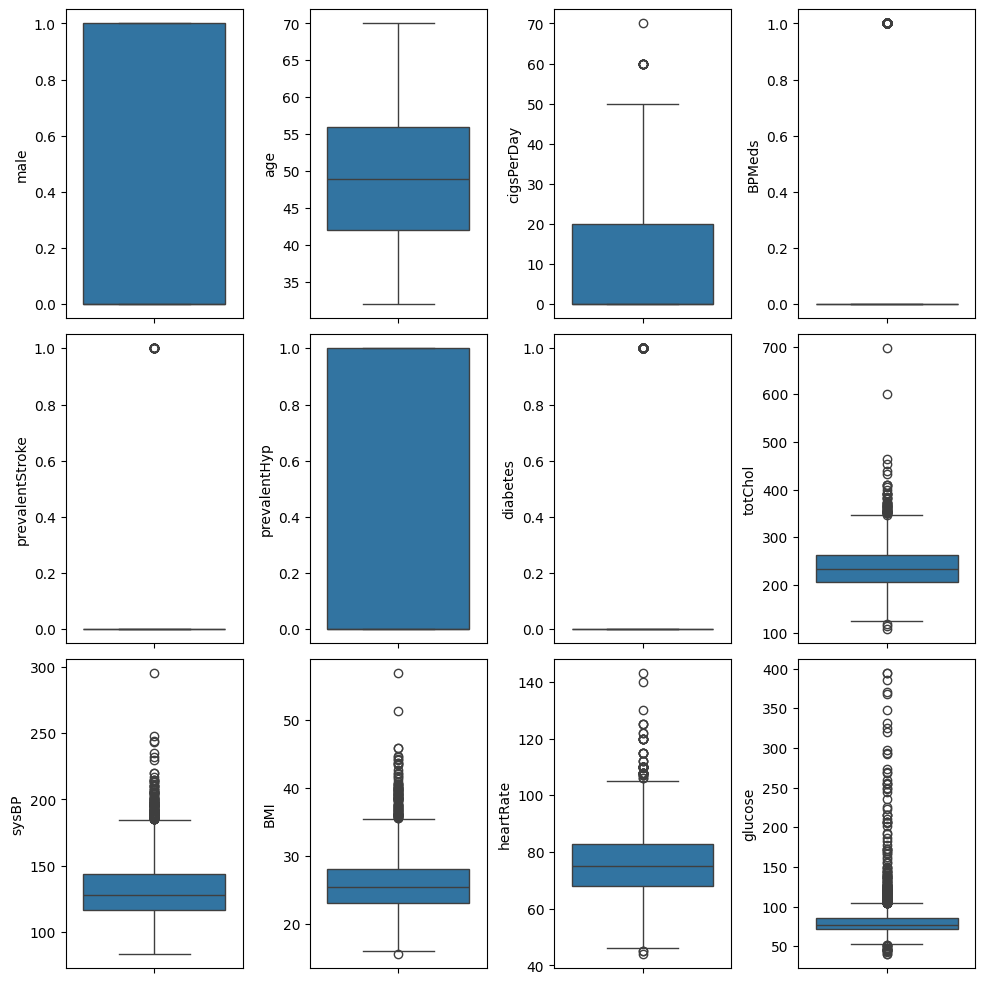

In [28]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in data.items():
    sns.boxplot(y=v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

Conclusion of Boxplot :

Outliers found in features named ['totChol', 'sysBP', 'BMI','heartRate', 'glucose']

In [29]:
print('Number of training examples to be deleted for outliers removal is ',len(data[data['sysBP'] > 220]) + len(data[data['BMI'] > 43]) + len(
    data[data['heartRate'] > 125]) + len(data[data['glucose'] > 200]) + len(
    data[data['totChol'] > 450]))

Number of training examples to be deleted for outliers removal is  60


In [30]:
data = data[~(data['sysBP'] > 220)]
data = data[~(data['BMI'] > 43)]
data = data[~(data['heartRate'] > 125)]
data = data[~(data['glucose'] > 200)]
data = data[~(data['totChol'] > 450)]
print(data.shape)

(4182, 13)


# Normalisation Checking

C:\Users\Satwik\AppData\Local\Temp\ipykernel_2932\2537646543.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=ax[i])
C:\Users\Satwik\AppData\Local\Temp\ipykernel_2932\2537646543.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=ax[i])
C:\Users\Satwik\AppData\Local\Temp\ipykernel

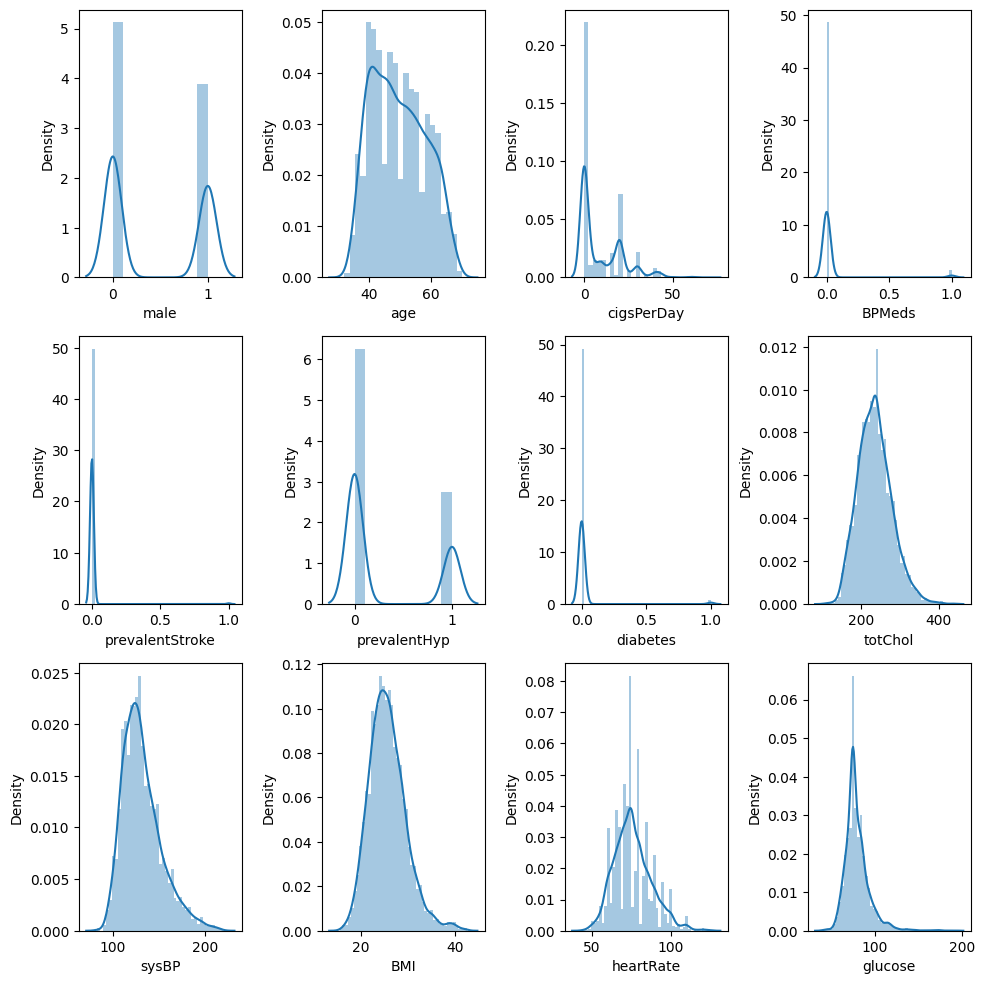

In [31]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in data.items():
    sns.distplot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_standardise = ['age','totChol','sysBP','BMI', 'heartRate', 'glucose', 'cigsPerDay']
data[cols_to_standardise] = scaler.fit_transform(data[cols_to_standardise])

In [33]:
data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
0,1.0,-1.227590,-0.753969,0.0,0.0,0.0,0.0,-0.958484,-1.221506,0.322186,0.357459,-0.192334,0.0
1,0.0,-0.410239,-0.753969,0.0,0.0,0.0,0.0,0.316704,-0.512910,0.772315,1.620039,-0.263064,0.0
2,1.0,-0.176710,0.923077,0.0,0.0,0.0,0.0,0.200778,-0.205852,-0.094694,-0.063401,-0.687444,0.0
3,0.0,1.341227,1.761600,0.0,0.0,1.0,0.0,-0.262927,0.857042,0.733952,-0.905121,1.646646,1.0
4,0.0,-0.410239,1.174634,0.0,0.0,0.0,0.0,1.128188,-0.087753,-0.667585,0.778319,0.373506,0.0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.20, random_state=0)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv('./heart_study_train.csv')
test_data.to_csv('./heart_study_test.csv')

# Model Fitting

## Test Data Preprocessing Similar to Train Data

In [37]:
imputer = SimpleImputer(strategy='most_frequent')
new_test_data = pd.DataFrame(imputer.fit_transform(test_data))
new_test_data.columns = test_data.columns
new_test_data.index = test_data.index
test_data = new_test_data.copy()

In [38]:
scaler = StandardScaler()
test_data[cols_to_standardise] = scaler.fit_transform(test_data[cols_to_standardise])

In [39]:
test_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
2850,1.0,0.306443,0.868716,0.0,0.0,0.0,0.0,0.068990,0.142226,0.496492,2.074529,0.542546,0.0
75,0.0,1.133078,-0.744765,0.0,0.0,1.0,0.0,0.491857,0.301375,2.181676,-0.921593,1.703956,1.0
2103,0.0,-0.638283,-0.744765,0.0,0.0,0.0,0.0,0.068990,-0.198807,-0.872412,-1.349610,-0.328511,0.0
553,1.0,0.424534,-0.744765,0.0,0.0,1.0,0.0,0.068990,1.938333,1.012919,0.448063,-0.401099,1.0
332,0.0,1.369260,-0.744765,0.0,0.0,0.0,0.0,1.736966,-0.994550,0.820186,-0.407972,-0.183335,0.0


# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,f1_score

In [41]:
X_train = train_data.loc[:,train_data.columns != 'CHD']
y_train = train_data.loc[:,'CHD']
X_test = test_data.loc[:, test_data.columns !='CHD']
y_test = test_data.loc[:, 'CHD']

In [42]:
rf_clf=RandomForestClassifier(max_depth=20,n_estimators=200,min_samples_split=30,random_state=42)

In [43]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [44]:
rf_accuracy = accuracy_score(y_pred_rf, y_test)*100
print('Accuracy score for Random Forest is %f'%rf_accuracy)

Accuracy score for Random Forest is 84.587814


In [45]:
rf_train_score = rf_clf.score(X_train, y_train)*100
print('Train score for Random Forest is %f'%rf_train_score)

Train score for Random Forest is 87.443946


In [46]:
print('Difference between train and test scores for Random Forest is : %f'%(rf_train_score - rf_accuracy))

Difference between train and test scores for Random Forest is : 2.856133


In [47]:
confusion_matrix(y_pred_rf, y_test)

array([[706, 125],
       [  4,   2]], dtype=int64)

In [48]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       831
         1.0       0.02      0.33      0.03         6

    accuracy                           0.85       837
   macro avg       0.51      0.59      0.47       837
weighted avg       0.99      0.85      0.91       837



# Neural Network

In [49]:
from keras.models import Sequential
from keras.layers import Dense

In [50]:
train_data.shape

(3345, 13)

In [51]:
model = Sequential()
model.add(Dense(15,activation='relu',input_dim=12))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\Satwik\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7635 - loss: 0.5678
Epoch 2/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8487 - loss: 0.4370
Epoch 3/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3889
Epoch 4/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3854
Epoch 5/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.3876
Epoch 6/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8535 - loss: 0.3919
Epoch 7/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3886
Epoch 8/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8588 - loss: 0.3777
Epoch 9/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3750
Epoch 10/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3770
Epoch 11/200
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3688
Epoch 12/200
105/105 ━━━━━━━━━━━━━━━━━━━━

In [54]:
y_pred_nn = model.predict(X_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [55]:
y_pred_nn.shape

(837, 1)

In [56]:
y_test_classes = (y_test > 0.5).astype("int32")
y_pred_classes_nn = (y_pred_nn > 0.5).astype(int)

In [57]:
accuracy_nn = accuracy_score(y_test_classes, y_pred_classes_nn)*100
print("Accuracy:", accuracy_nn)
confusion_matrix(y_test_classes, y_pred_classes_nn)

Accuracy: 83.99044205495818


array([[698,  12],
       [122,   5]], dtype=int64)

In [59]:
print(classification_report(y_pred_classes_nn, y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       820
           1       0.04      0.29      0.07        17

    accuracy                           0.84       837
   macro avg       0.51      0.57      0.49       837
weighted avg       0.96      0.84      0.90       837



# Our Model (Random Forest + Neural Network)

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
sfm = SelectFromModel(rf_clf, threshold=0.07)
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

smo = Sequential()
smo.add(Dense(20,activation='relu',input_dim=X_train_selected.shape[1]))
smo.add(Dense(7,activation='sigmoid'))
smo.add(Dense(1,activation='sigmoid'))
smo.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

C:\Users\Satwik\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
smo.fit(X_train_selected, y_train, epochs=100, batch_size=32, validation_data=(X_test_selected, y_test))

Epoch 1/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8551 - loss: 0.5194 - val_accuracy: 0.8483 - val_loss: 0.4349
Epoch 2/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8572 - loss: 0.4136 - val_accuracy: 0.8483 - val_loss: 0.4099
Epoch 3/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8598 - loss: 0.3914 - val_accuracy: 0.8483 - val_loss: 0.4004
Epoch 4/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8542 - loss: 0.3894 - val_accuracy: 0.8483 - val_loss: 0.3947
Epoch 5/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3698 - val_accuracy: 0.8483 - val_loss: 0.3917
Epoch 6/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8483 - loss: 0.3918 - val_accuracy: 0.8483 - val_loss: 0.3902
Epoch 7/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.3701 - val_accuracy: 0.8483 - val_loss: 0.3898
Epoch 8/100
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8569 - loss: 0.3768 - val_accu

In [70]:
predictions = smo.predict(X_test_selected)
binary_predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy)
confusion_matrix(y_test, binary_predictions)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8470728793309439


array([[703,   7],
       [121,   6]], dtype=int64)

In [71]:
print(classification_report(binary_predictions, y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       824
           1       0.05      0.46      0.09        13

    accuracy                           0.85       837
   macro avg       0.52      0.66      0.50       837
weighted avg       0.98      0.85      0.90       837

